<a href="https://colab.research.google.com/github/hamednasr/tensorflow/blob/main/02_ANN_tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix,classification_report
import scipy.stats as stats
from sklearn.preprocessing import Normalizer

In [3]:
n_samples = 500
X, y = make_circles(n_samples, noise=.07,factor = .7)

In [4]:
X.shape

(500, 2)

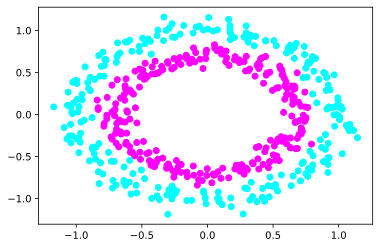

In [5]:
plt.scatter(X[:,0],X[:,1],c=y, cmap = 'cool')

In [6]:
y[:10]

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64,activation='leaky_relu'),
                             tf.keras.layers.Dense(128,activation='leaky_relu'),
                             tf.keras.layers.Dense(128,activation='leaky_relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 10**(x/20))

history = model.fit(X_train,y_train,epochs=20,callbacks=[scheduler])

Epoch 1/20
15/15 [==============================] - 2s 6ms/step - loss: 0.6849 - accuracy: 0.5000 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.5044 - lr: 0.0011
Epoch 3/20
15/15 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.5333 - lr: 0.0013
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.6177 - accuracy: 0.7822 - lr: 0.0014
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.8489 - lr: 0.0016
Epoch 6/20
15/15 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.9689 - lr: 0.0018
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.9667 - lr: 0.0020
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1315 - accuracy: 0.9467 - lr: 0.0022
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9667 - lr: 0.0025
E

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


In [28]:
weights ,biases = model.layers[0].get_weights()

In [29]:
weights,weights.shape

(array([[ 0.3031617 , -0.282756  , -0.07601587,  0.23377007, -0.0890023 ,
         -0.01123001,  0.05496353, -0.16142806,  0.262286  , -0.2172449 ,
          0.13383895,  0.08364384,  0.03950962,  0.24330242, -0.1405782 ,
          0.05793178,  0.29277545,  0.05697293,  0.19656394,  0.12594593,
          0.14175025, -0.13081957, -0.2197358 , -0.10877688, -0.13471459,
          0.08415277,  0.29227436,  0.26870358,  0.1422479 ,  0.28756428,
         -0.04767649, -0.10973216,  0.2487047 , -0.13623735,  0.01404471,
         -0.12721318, -0.31193605,  0.06214345,  0.08893122,  0.31676576,
         -0.06712903, -0.36485255,  0.1389578 ,  0.07808221, -0.21388415,
         -0.2624958 , -0.21767722, -0.25737756,  0.18442106,  0.11980937,
          0.01073804,  0.21483225,  0.05421628, -0.20848055, -0.17556846,
          0.18544164,  0.2758343 , -0.26971787, -0.09740592, -0.20854591,
          0.04121362, -0.26503867,  0.2203391 , -0.05676277],
        [-0.17400844,  0.05447469, -0.17246522,  0

(array([1., 1., 5., 4., 7., 0., 8., 9., 4., 7., 4., 3., 4., 2., 3., 3., 5.,
        9., 6., 3., 6., 3., 1., 5., 2., 5., 6., 7., 2., 3.]),
 array([-0.36485255, -0.34096885, -0.31708515, -0.29320145, -0.26931775,
        -0.24543406, -0.22155036, -0.19766666, -0.17378296, -0.14989926,
        -0.12601556, -0.10213187, -0.07824817, -0.05436447, -0.03048077,
        -0.00659707,  0.01728663,  0.04117033,  0.06505402,  0.08893772,
         0.11282142,  0.13670512,  0.16058882,  0.18447252,  0.20835622,
         0.23223992,  0.2561236 ,  0.2800073 ,  0.303891  ,  0.3277747 ,
         0.3516584 ], dtype=float32),
 <a list of 30 Patch objects>)

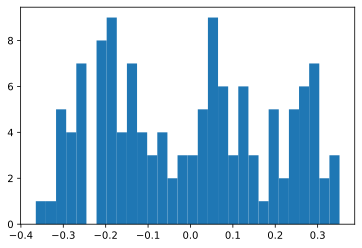

In [32]:
plt.hist(weights.flatten(),bins=30)

In [9]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.684875,0.500000,0.001000
1,0.671329,0.504444,0.001122
2,0.650794,0.533333,0.001259
3,0.617700,0.782222,0.001413
4,0.525387,0.848889,0.001585
5,0.329693,0.968889,0.001778
6,0.172377,0.966667,0.001995
7,0.131462,0.946667,0.002239
8,0.098785,0.966667,0.002512
9,0.089320,0.960000,0.002818


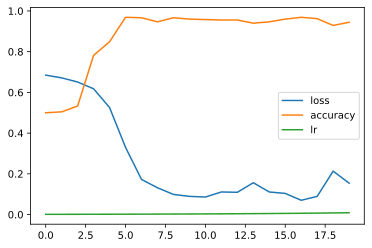

In [11]:
results = pd.DataFrame(history.history)
plt.figure()
plt.plot(results)
plt.legend(list(results.columns));

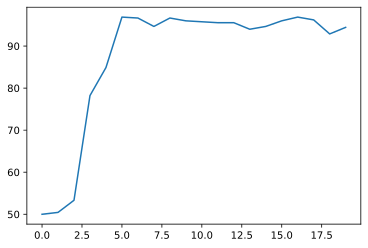

In [12]:
plt.plot(np.array(history.history['accuracy'])*100)

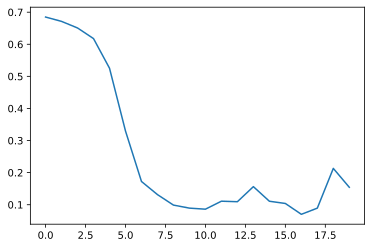

In [13]:
plt.plot(history.history['loss'])

In [14]:
model.evaluate(X_train,y_train)

15/15 [==============================] - 0s 2ms/step - loss: 0.2253 - accuracy: 0.9067


[0.225251704454422, 0.9066666960716248]

In [15]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.3104 - accuracy: 0.8600


[0.310416579246521, 0.8600000143051147]

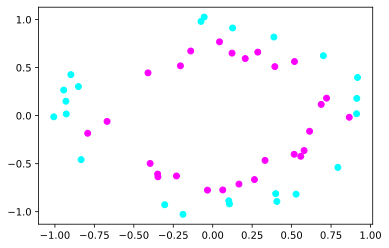

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test, cmap = 'cool')

In [17]:
y_test

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1])

In [18]:
y_pred = np.squeeze(np.multiply((model.predict(X_test)>.5),1))
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1])

In [19]:
confusion_matrix(y_test,y_pred)

array([[16,  7],
       [ 0, 27]])

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        23
           1       0.79      1.00      0.89        27

    accuracy                           0.86        50
   macro avg       0.90      0.85      0.85        50
weighted avg       0.89      0.86      0.86        50



# exersices

In [35]:
model2 = tf.keras.Sequential([
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(6,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = 'accuracy')

history = model2.fit(X_train, y_train, epochs=100, validation_split=.1)

Epoch 1/100
13/13 [==============================] - 1s 19ms/step - loss: 0.6947 - accuracy: 0.4840 - val_loss: 0.6916 - val_accuracy: 0.4667
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5160 - val_loss: 0.6882 - val_accuracy: 0.4667
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5160 - val_loss: 0.6865 - val_accuracy: 0.4667
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5160 - val_loss: 0.6850 - val_accuracy: 0.4667
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6855 - accuracy: 0.5160 - val_loss: 0.6835 - val_accuracy: 0.4667
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.5160 - val_loss: 0.6823 - val_accuracy: 0.4667
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5160 - val_loss: 0.6813 - val_accuracy: 0.4667
Epoch 8/100


In [36]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.694666,0.483951,0.691550,0.466667
1,0.691202,0.516049,0.688238,0.466667
2,0.689021,0.516049,0.686457,0.466667
3,0.687069,0.516049,0.685031,0.466667
4,0.685491,0.516049,0.683499,0.466667
...,...,...,...,...
95,0.017255,0.997531,0.009364,1.000000
96,0.016484,0.997531,0.011881,1.000000
97,0.016217,0.997531,0.011795,1.000000
98,0.015987,0.997531,0.011096,1.000000


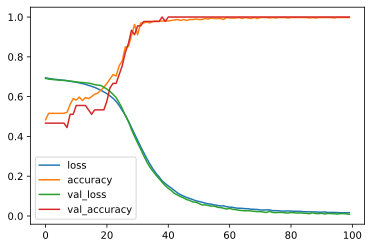

In [37]:
pd.DataFrame(history.history).plot()

In [38]:
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 6)                 18        
                                                                 
 dense_100 (Dense)           (None, 6)                 42        
                                                                 
 dense_101 (Dense)           (None, 6)                 42        
                                                                 
 dense_102 (Dense)           (None, 6)                 42        
                                                                 
 dense_103 (Dense)           (None, 6)                 42        
                                                                 
 dense_104 (Dense)           (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable

## make moon dataset

In [47]:
X, y = make_moons(200,noise=.1)

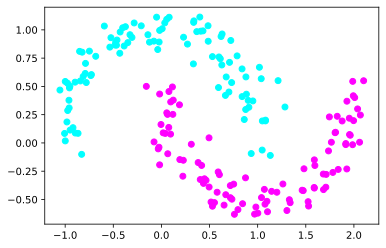

In [48]:
plt.scatter(X[:,0],X[:,1],c=y, cmap = 'cool')

In [49]:
y[:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)